<a href="https://colab.research.google.com/github/olgaminguett/ET5003_SEM1_2021-2/blob/main/Week-3/ET5003_Etivity2_OlgaMinguett_20179766.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_Etivity-2

In [94]:
#@title Current Date
Today = '2021-09-20' #@param {type:"date"}


In [95]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = "20179766" #@param {type:"string"}
Student_full_name = "Olga Minguett" #@param {type:"string"}
#@markdown ---

In [96]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Draft' #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

***The goal is to use advanced Machine Learning methods to predict House price.***

## Import Libraries

In [97]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

# to plot
import seaborn as sns
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
import pandas as pd

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

# to use mathematical functions
import numpy as np

# for Bayesian statistical modeling and probabilistic ML
import pymc3 as pm

# for exploratory analysis of Bayesian models
import arviz as az

# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

In [98]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-ET5003/ET5003_SEM1_2021-2/tree/main/Week-3). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

## Read Data 

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
# Path, copy the path from your Drive
syntPath = '/content/drive/My Drive/Colab Notebooks/house-data/' 

In [101]:
# House Data
house_train = syntPath + 'house_train.csv'
house_test = syntPath + 'house_test.csv'
true_price = syntPath + 'true_price.csv'

In [102]:
# Read datasets
house_train = pd.read_csv(house_train)
house_test = pd.read_csv(house_test)
true_price = pd.read_csv(true_price)

## Data Examination

### True Price

In [103]:
true_price.sample(3)

,Id,Expected
38,12383622,350000.0
253,12073715,2250000.0
331,12392873,595000.0


In [104]:
# Rename columns in the existing DataFrame
true_price.rename(columns={'Id': 'ad_id'}, inplace=True)

In [105]:
#Concise summary of the dataframe
true_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ad_id     500 non-null    int64  
 1   Expected  500 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [106]:
#Returns the dimensions of the array - Rows & Columns
true_price.shape

(500, 2)

### House Data

In [107]:
# Print sample rows of the dataframe
house_train.sample(3)

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
1734,12384805,Ballinteer,2.0,2.0,C3,Dublin,"Nestled in a desirable corner position, this w...",prod,NaN,Wonderfully bright and spacious ground floor a...,53.273253,-6.257602,NaN,340000.0,sale,apartment,79.99
1573,12380233,Clondalkin,2.0,2.0,D2,Dublin,RAY COOKE AUCTIONEERS are delighted to present...,prod,NaN,None,53.323626,-6.423100,NaN,159000.0,sale,apartment,70.60
1489,12377582,Park West,2.0,2.0,C2,Dublin,REA McGEE are delighted to present this superb...,prod,NaN,Electric heating\nDouble glazed windows\nExcel...,53.332099,-6.376762,NaN,209950.0,sale,apartment,63.00


In [108]:
# Print sample rows of the dataframe
house_test.sample(3)

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,property_category,property_type,surface
277,12226499,Portobello,1.0,2.0,F,Dublin,16 Bloomfield Park is a very charming and welc...,prod,NaN,Two-bed red brick semi\nSouth facing terrace\n...,53.330511,-6.272535,NaN,sale,semi-detached,71.0
231,12328201,Dalkey,2.0,3.0,C2,Dublin,DNG are delighted to launch this superb 3 bedr...,prod,"Parking,Gas Fired Central Heating",Penthouse 3 bedroom Luxurious apartment \nDoub...,53.283565,-6.104818,NaN,sale,apartment,136.0
238,12407573,Swords,3.0,3.0,C1,Dublin,Brophy Estates are delighted to present this s...,prod,"Parking,Gas Fired Central Heating,Alarm,Wired ...","Superb 3 bedroom home\nTriple aspect, East, So...",53.444255,-6.212952,NaN,sale,terraced,90.0


In [109]:
#Returns column name
print('Train Data Columns',house_train.columns)
print('Test Data Columns',house_test.columns)

Train Data Columns Index(['ad_id', 'area', 'bathrooms', 'beds', 'ber_classification', 'county',
       'description_block', 'environment', 'facility', 'features', 'latitude',
       'longitude', 'no_of_units', 'price', 'property_category',
       'property_type', 'surface'],
      dtype='object')
Test Data Columns Index(['ad_id', 'area', 'bathrooms', 'beds', 'ber_classification', 'county',
       'description_block', 'environment', 'facility', 'features', 'latitude',
       'longitude', 'no_of_units', 'property_category', 'property_type',
       'surface'],
      dtype='object')


In [110]:
#Returns the dimensions of the array - Rows & Columns
print('Train Data Shape',house_train.shape)
print('Test Data Shape',house_test.shape)

Train Data Shape (2982, 17)
Test Data Shape (500, 16)


In [111]:
#Concise summary of the dataframe
print('Train Data Information')
house_train.info()

Train Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ad_id               2982 non-null   int64  
 1   area                2982 non-null   object 
 2   bathrooms           2931 non-null   float64
 3   beds                2931 non-null   float64
 4   ber_classification  2305 non-null   object 
 5   county              2982 non-null   object 
 6   description_block   2982 non-null   object 
 7   environment         2982 non-null   object 
 8   facility            965 non-null    object 
 9   features            2982 non-null   object 
 10  latitude            2982 non-null   float64
 11  longitude           2982 non-null   float64
 12  no_of_units         59 non-null     float64
 13  price               2892 non-null   float64
 14  property_category   2982 non-null   object 
 15  property_type       2931 non-nul

In [112]:
print('Test Data Information')
house_test.info()

Test Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ad_id               500 non-null    int64  
 1   area                500 non-null    object 
 2   bathrooms           500 non-null    float64
 3   beds                500 non-null    float64
 4   ber_classification  444 non-null    object 
 5   county              500 non-null    object 
 6   description_block   500 non-null    object 
 7   environment         500 non-null    object 
 8   facility            189 non-null    object 
 9   features            500 non-null    object 
 10  latitude            500 non-null    float64
 11  longitude           500 non-null    float64
 12  no_of_units         0 non-null      float64
 13  property_category   500 non-null    object 
 14  property_type       500 non-null    object 
 15  surface             500 non-null   

In [113]:
# Missing Values
print('Train Data Missing Values')
print(house_train.isna().sum())

Train Data Missing Values
ad_id                    0
area                     0
bathrooms               51
beds                    51
ber_classification     677
county                   0
description_block        0
environment              0
facility              2017
features                 0
latitude                 0
longitude                0
no_of_units           2923
price                   90
property_category        0
property_type           51
surface                551
dtype: int64


In [114]:
print('Test Data Missing Values')
print(house_test.isna().sum())

Test Data Missing Values
ad_id                   0
area                    0
bathrooms               0
beds                    0
ber_classification     56
county                  0
description_block       0
environment             0
facility              311
features                0
latitude                0
longitude               0
no_of_units           500
property_category       0
property_type           0
surface                 0
dtype: int64


In [115]:
#Percentage of NAN Values
print('Train Data Percentage of NAN Values')
print(house_train.isna().mean().round(4) * 100)

Train Data Percentage of NAN Values
ad_id                  0.00
area                   0.00
bathrooms              1.71
beds                   1.71
ber_classification    22.70
county                 0.00
description_block      0.00
environment            0.00
facility              67.64
features               0.00
latitude               0.00
longitude              0.00
no_of_units           98.02
price                  3.02
property_category      0.00
property_type          1.71
surface               18.48
dtype: float64


In [116]:
print('Test Data Percentage of NAN Values')
print(house_test.isna().mean().round(4) * 100)

Test Data Percentage of NAN Values
ad_id                   0.0
area                    0.0
bathrooms               0.0
beds                    0.0
ber_classification     11.2
county                  0.0
description_block       0.0
environment             0.0
facility               62.2
features                0.0
latitude                0.0
longitude               0.0
no_of_units           100.0
property_category       0.0
property_type           0.0
surface                 0.0
dtype: float64


## Process and Encode the Features

### Missing Values


#### Numerical Attributes

Bathrooms

In [117]:
house_train.dropna(subset=['bathrooms'], inplace=True)

Number of Units

In [118]:
house_train.drop('no_of_units', axis=1, inplace=True)
house_test.drop('no_of_units', axis=1, inplace=True)

Price

In [119]:
house_train.dropna(subset=['price'], inplace=True)

Surface

In [120]:
house_train['surface'].fillna(house_train['surface'].median(), inplace=True)

#### Categorical Attributes

Area

In [121]:
house_train['area'].replace({'Temple Bar':'Dublin 1', 'IFSC':'Dublin 1', 
                            'Grand Canal Dock':'Dublin 2',
                            'Clontarf':'Dublin 3', 'East Wall':'Dublin 3', 'North Strand':'Dublin 3', 'Fairview':'Dublin 3', 'Marino':'Dublin 3', 'Ballyboughal':'Dublin 3', 
                            'Ballsbridge':'Dublin 4', 'Donnybrook':'Dublin 4','Sandymount':'Dublin 4','Ringsend':'Dublin 4','Irishtown':'Dublin 4','Merrion':'Dublin 4',
                            'Artane':'Dublin 5','Raheny':'Dublin 5','Kilbarrack':'Dublin 5','Edenmore':'Dublin 5','Kilmore':'Dublin 5','Donnycarney':'Dublin 5',
                            'Rathmines':'Dublin 6','Rathgar':'Dublin 6','Ranelagh':'Dublin 6','Milltown':'Dublin 6','Dartry':'Dublin 6',
                            'Stoneybatter':'Dublin 7','Phibsborough':'Dublin 7','Navan Road (D7)':'Dublin 7','North Circular Road':'Dublin 7','Smithfield':'Dublin 7','Ashtown':'Dublin 7','Cabra':'Dublin 7',
                            'Kilmainham':'Dublin 8','Inchicore':'Dublin 8','Rialto':'Dublin 8','Portobello':'Dublin 8','South Circular Road':'Dublin 8','Islandbridge':'Dublin 8','The Coombe':'Dublin 8',"Dolphin's Barn":'Dublin 8','Christchurch':'Dublin 8',
                            'Drumcondra':'Dublin 9','Glasnevin':'Dublin 9','Santry':'Dublin 9','Whitehall':'Dublin 9','Beaumont':'Dublin 9','Ballymun':'Dublin 9','Poppintree':'Dublin 9',
                            'Ballyfermot':'Dublin 10','Cherry Orchard':'Dublin 10',
                            'Finglas':'Dublin 11',"St Margaret's":'Dublin 11',
                            'Walkinstown':'Dublin 12','Crumlin':'Dublin 12','Drimnagh':'Dublin 12','Bluebell':'Dublin 12','Park West':'Dublin 12','Perrystown':'Dublin 12',
                            'Malahide':'Dublin 13','Howth':'Dublin 13','Sutton':'Dublin 13','Baldoyle':'Dublin 13','Donaghmede':'Dublin 13','Bayside':'Dublin 13','Ard Na Greine':'Dublin 13','Clongriffin':'Dublin 13','Clarehall':'Dublin 13',
                            'Dundrum':'Dublin 14','Churchtown':'Dublin 14','Goatstown':'Dublin 14','Clonskeagh':'Dublin 14','Windy Arbour':'Dublin 14',
                            'Carpenterstown':'Dublin 15','Castleknock':'Dublin 15','Clonsilla':'Dublin 15','Blanchardstown':'Dublin 15','Clonee':'Dublin 15','Coolmine':'Dublin 15','Hartstown':'Dublin 15','Mulhuddart':'Dublin 15','The Ward':'Dublin 15','Ongar':'Dublin 15','Tyrrelstown':'Dublin 15',
                            'Rathfarnham':'Dublin 16','Ballinteer':'Dublin 16','Ballinascorney':'Dublin 16','Knocklyon':'Dublin 16',
                            'Darndale':'Dublin 17','Clonshaugh':'Dublin 17','Coolock':'Dublin 17','Killester':'Dublin 17',
                            'Deansgrange':'Dublin 18','Sandyford':'Dublin 18','Foxrock':'Dublin 18','Stepaside':'Dublin 18','Cabinteely':'Dublin 18','Carrickmines':'Dublin 18','Leopardstown':'Dublin 18','Kilternan':'Dublin 18','Shankill':'Dublin 18',
                            'Palmerstown':'Dublin 20','Chapelizod':'Dublin 20','Lucan':'Dublin 20',
                            'Clondalkin':'Dublin 22','Kingswood':'Dublin 22','Newcastle':'Dublin 22',
                            'Ballymount':'Dublin 24','Kiltipper':'Dublin 24','Tallaght':'Dublin 24','Balrothery':'Dublin 24','Rathcoole':'Dublin 24','Kilnamanagh':'Dublin 24','Firhouse':'Dublin 24','Greenhills':'Dublin 24','Oldbawn':'Dublin 24','Adamstown':'Dublin 24','Saggart':'Dublin 24','Citywest':'Dublin 24','Ballycullen':'Dublin 24','Brittas':'Dublin 24',
                            'Terenure':'Dublin 6w',"Harold's Cross":'Dublin 6w','Kimmage':'Dublin 6w','Templeogue':'Dublin 6w',
                            'Donabate':'Co. Fingal','Swords':'Co. Fingal','Portmarnock':'Co. Fingal','Kinsealy':'Co. Fingal','Balgriffin':'Co. Fingal','Garristown':'Co. Fingal','Naul':'Co. Fingal','Skerries':'Co. Fingal','Rush':'Co. Fingal','Lusk':'Co. Fingal','Balbriggan':'Co. Fingal','Loughshinny':'Co. Fingal','Ballybough':'Co. Fingal',
                            'Blackrock':'Co. Dun Laoghaire-Rathdown','Dun Laoghaire':'Co. Dun Laoghaire-Rathdown','Glenageary':'Co. Dun Laoghaire-Rathdown',
                            'Monkstown':'Co. Dun Laoghaire-Rathdown','Booterstown':'Co. Dun Laoghaire-Rathdown','Sandycove':'Co. Dun Laoghaire-Rathdown',
                            'Rathmichael':'Co. Dun Laoghaire-Rathdown','Mount Merrion':'Co. Dun Laoghaire-Rathdown','Ballybrack':'Co. Dun Laoghaire-Rathdown','Sallynoggin':'Co. Dun Laoghaire-Rathdown',
                            'Kilmacud':'Co. Dun Laoghaire-Rathdown','Dalkey':'Co. Dun Laoghaire-Rathdown','Killiney':'Co. Dun Laoghaire-Rathdown','Loughlinstown':'Co. Dun Laoghaire-Rathdown',
                            }, inplace=True)

In [122]:
house_test['area'].replace({'Temple Bar':'Dublin 1', 'IFSC':'Dublin 1', 
                            'Grand Canal Dock':'Dublin 2',
                            'Clontarf':'Dublin 3', 'East Wall':'Dublin 3', 'North Strand':'Dublin 3', 'Fairview':'Dublin 3', 'Marino':'Dublin 3', 'Ballyboughal':'Dublin 3', 
                            'Ballsbridge':'Dublin 4', 'Donnybrook':'Dublin 4','Sandymount':'Dublin 4','Ringsend':'Dublin 4','Irishtown':'Dublin 4','Merrion':'Dublin 4',
                            'Artane':'Dublin 5','Raheny':'Dublin 5','Kilbarrack':'Dublin 5','Edenmore':'Dublin 5','Kilmore':'Dublin 5','Donnycarney':'Dublin 5',
                            'Rathmines':'Dublin 6','Rathgar':'Dublin 6','Ranelagh':'Dublin 6','Milltown':'Dublin 6','Dartry':'Dublin 6',
                            'Stoneybatter':'Dublin 7','Phibsborough':'Dublin 7','Navan Road (D7)':'Dublin 7','North Circular Road':'Dublin 7','Smithfield':'Dublin 7','Ashtown':'Dublin 7','Cabra':'Dublin 7',
                            'Kilmainham':'Dublin 8','Inchicore':'Dublin 8','Rialto':'Dublin 8','Portobello':'Dublin 8','South Circular Road':'Dublin 8','Islandbridge':'Dublin 8','The Coombe':'Dublin 8',"Dolphin's Barn":'Dublin 8','Christchurch':'Dublin 8',
                            'Drumcondra':'Dublin 9','Glasnevin':'Dublin 9','Santry':'Dublin 9','Whitehall':'Dublin 9','Beaumont':'Dublin 9','Ballymun':'Dublin 9','Poppintree':'Dublin 9',
                            'Ballyfermot':'Dublin 10','Cherry Orchard':'Dublin 10',
                            'Finglas':'Dublin 11',"St Margaret's":'Dublin 11',
                            'Walkinstown':'Dublin 12','Crumlin':'Dublin 12','Drimnagh':'Dublin 12','Bluebell':'Dublin 12','Park West':'Dublin 12','Perrystown':'Dublin 12',
                            'Malahide':'Dublin 13','Howth':'Dublin 13','Sutton':'Dublin 13','Baldoyle':'Dublin 13','Donaghmede':'Dublin 13','Bayside':'Dublin 13','Ard Na Greine':'Dublin 13','Clongriffin':'Dublin 13','Clarehall':'Dublin 13',
                            'Dundrum':'Dublin 14','Churchtown':'Dublin 14','Goatstown':'Dublin 14','Clonskeagh':'Dublin 14','Windy Arbour':'Dublin 14',
                            'Carpenterstown':'Dublin 15','Castleknock':'Dublin 15','Clonsilla':'Dublin 15','Blanchardstown':'Dublin 15','Clonee':'Dublin 15','Coolmine':'Dublin 15','Hartstown':'Dublin 15','Mulhuddart':'Dublin 15','The Ward':'Dublin 15','Ongar':'Dublin 15','Tyrrelstown':'Dublin 15',
                            'Rathfarnham':'Dublin 16','Ballinteer':'Dublin 16','Ballinascorney':'Dublin 16','Knocklyon':'Dublin 16',
                            'Darndale':'Dublin 17','Clonshaugh':'Dublin 17','Coolock':'Dublin 17','Killester':'Dublin 17',
                            'Deansgrange':'Dublin 18','Sandyford':'Dublin 18','Foxrock':'Dublin 18','Stepaside':'Dublin 18','Cabinteely':'Dublin 18','Carrickmines':'Dublin 18','Leopardstown':'Dublin 18','Kilternan':'Dublin 18','Shankill':'Dublin 18',
                            'Palmerstown':'Dublin 20','Chapelizod':'Dublin 20','Lucan':'Dublin 20',
                            'Clondalkin':'Dublin 22','Kingswood':'Dublin 22','Newcastle':'Dublin 22',
                            'Ballymount':'Dublin 24','Kiltipper':'Dublin 24','Tallaght':'Dublin 24','Balrothery':'Dublin 24','Rathcoole':'Dublin 24','Kilnamanagh':'Dublin 24','Firhouse':'Dublin 24','Greenhills':'Dublin 24','Oldbawn':'Dublin 24','Adamstown':'Dublin 24','Saggart':'Dublin 24','Citywest':'Dublin 24','Ballycullen':'Dublin 24','Brittas':'Dublin 24',
                            'Terenure':'Dublin 6w',"Harold's Cross":'Dublin 6w','Kimmage':'Dublin 6w','Templeogue':'Dublin 6w',
                            'Donabate':'Co. Fingal','Swords':'Co. Fingal','Portmarnock':'Co. Fingal','Kinsealy':'Co. Fingal','Balgriffin':'Co. Fingal','Garristown':'Co. Fingal','Naul':'Co. Fingal','Skerries':'Co. Fingal','Rush':'Co. Fingal','Lusk':'Co. Fingal','Balbriggan':'Co. Fingal','Loughshinny':'Co. Fingal','Ballybough':'Co. Fingal',
                            'Blackrock':'Co. Dun Laoghaire-Rathdown','Dun Laoghaire':'Co. Dun Laoghaire-Rathdown','Glenageary':'Co. Dun Laoghaire-Rathdown',
                            'Monkstown':'Co. Dun Laoghaire-Rathdown','Booterstown':'Co. Dun Laoghaire-Rathdown','Sandycove':'Co. Dun Laoghaire-Rathdown',
                            'Rathmichael':'Co. Dun Laoghaire-Rathdown','Mount Merrion':'Co. Dun Laoghaire-Rathdown','Ballybrack':'Co. Dun Laoghaire-Rathdown','Sallynoggin':'Co. Dun Laoghaire-Rathdown',
                            'Kilmacud':'Co. Dun Laoghaire-Rathdown','Dalkey':'Co. Dun Laoghaire-Rathdown','Killiney':'Co. Dun Laoghaire-Rathdown','Loughlinstown':'Co. Dun Laoghaire-Rathdown',
                            }, inplace=True)

In [123]:
house_train['area'].value_counts()

Co. Fingal                    300
Co. Dun Laoghaire-Rathdown    253
Dublin 15                     214
Dublin 9                      197
Dublin 24                     179
Dublin 13                     175
Dublin 18                     155
Dublin 4                      146
Dublin 16                     128
Dublin 8                      127
Dublin 7                      118
Dublin 3                       96
Dublin 20                      96
Dublin 11                      92
Dublin 12                      86
Dublin 14                      84
Dublin 6                       80
Dublin 6w                      78
Dublin 22                      71
Dublin 1                       68
Dublin 5                       68
Dublin 2                       39
Dublin 17                      29
Dublin 10                      13
Name: area, dtype: int64

In [124]:
house_test['area'].value_counts()

Co. Fingal                    62
Co. Dun Laoghaire-Rathdown    55
Dublin 4                      36
Dublin 15                     30
Dublin 18                     30
Dublin 9                      29
Dublin 6w                     26
Dublin 8                      25
Dublin 3                      24
Dublin 16                     23
Dublin 7                      22
Dublin 13                     21
Dublin 6                      20
Dublin 24                     18
Dublin 20                     17
Dublin 5                      17
Dublin 12                     12
Dublin 14                     10
Dublin 22                      8
Dublin 2                       5
Dublin 1                       4
Dublin 17                      3
Dublin 11                      2
Dublin 10                      1
Name: area, dtype: int64

In [125]:
area_mapper = {
          'Dublin 1': 1,                      
          'Dublin 2': 2,
          'Dublin 3': 3,
          'Dublin 4': 4,
          'Dublin 5': 5,
          'Dublin 6': 6,                      
          'Dublin 6w': 7,  
          'Dublin 7': 8, 
          'Dublin 8': 9,                    
          'Dublin 9': 10,
          'Dublin 10': 11,
          'Dublin 11': 12,                           
          'Dublin 12': 13,                      
          'Dublin 13': 14,
          'Dublin 14': 15,                   
          'Dublin 15': 16,
          'Dublin 16': 17, 
          'Dublin 17': 18,     
          'Dublin 18': 19, 
          'Dublin 20': 20,
          'Dublin 22': 21,                    
          'Dublin 24': 22,
          'Co. Fingal': 23,                    
          'Co. Dun Laoghaire-Rathdown': 24
          }
house_train['area'] = house_train['area'].replace(area_mapper)
house_test['area'] = house_test['area'].replace(area_mapper)

BER Classification

In [126]:
house_train['ber_classification'].value_counts()

D1                     283
D2                     272
C3                     264
C2                     242
C1                     211
E1                     182
E2                     168
G                      164
F                      163
B3                     130
B2                      73
A3                      66
SINo666of2006exempt     25
A2                      24
B1                      16
A1                       1
Name: ber_classification, dtype: int64

In [127]:
ber_classification_mapper = {
    "A1": 1,
    "A2": 2,
    "A3": 3,
    "B1": 4,
    "B2": 5,
    "B3": 6,
    "C1": 7,
    "C2": 8,
    "C3": 9,
    "D1": 10,
    "D2": 11,
    "E1": 12,
    "E2": 13,
    "F": 14,
    "G": 15,
    "SINo666of2006exempt": 16,
}
house_train['ber_classification'] = house_train['ber_classification'].replace(ber_classification_mapper)
house_test['ber_classification'] = house_test['ber_classification'].replace(ber_classification_mapper)

In [128]:
house_train['ber_classification'].fillna(house_train['ber_classification'].median(), inplace=True)
house_test['ber_classification'].fillna(house_test['ber_classification'].median(), inplace=True)

County

In [129]:
house_train['county'].value_counts()

Dublin    2892
Name: county, dtype: int64

In [130]:
house_train.drop('county', axis=1, inplace=True)
house_test.drop('county', axis=1, inplace=True)

Description Block

In [131]:
house_train['description_block'].value_counts()

Location\r\nThe property is situated at the northern end of Heronford Lane just off Ballycorus Road. The wood and grasslands to the north, and offset to the west will make up Ticknick park as part of the Cherrywood Development, due for completion in 2021. In terms of access and transportation, the site benefits from excellent communication links, including; Cherrywood Luas Stop, approx.1.4km east of the property, The M50 Motorway approx. 500m east, together with Shankill DART Station some 3.5km (approx. 10 minute drive) to the east. A range of amenities are provided in nearby Carrickmines, Shankill, Sandyford, and Cherrywood.\n\r\nDescription\r\nThe main property comprises a detached five bedroom house in need of complete renovation. The property extends to approximately 236.11 sq. m (2,541 sq. ft), and is currently arranged to provide open plan living accommodation and three bedrooms to first floor, with two large bedsitting type rooms to the ground floor. There are to further structu

In [132]:
house_train.drop('description_block', axis=1, inplace=True)
house_test.drop('description_block', axis=1, inplace=True)

Environment

In [133]:
house_train['environment'].value_counts()

prod    2892
Name: environment, dtype: int64

In [134]:
house_train.drop('environment', axis=1, inplace=True)
house_test.drop('environment', axis=1, inplace=True)

Facility

In [135]:
house_train['facility'].value_counts()

Parking,Gas Fired Central Heating                                                               184
Parking                                                                                         133
Parking,Gas Fired Central Heating,Wired for Cable Television                                    116
Parking,Gas Fired Central Heating,Alarm,Wired for Cable Television                              109
Parking,Gas Fired Central Heating,Alarm                                                          87
Parking,Wired for Cable Television                                                               51
Gas Fired Central Heating                                                                        46
Parking,Alarm                                                                                    26
Parking,Oil Fired Central Heating                                                                24
Parking,Gas Fired Central Heating,Alarm,Wired for Cable Television,Wheelchair Access             18


In [136]:
house_train.drop('facility', axis=1, inplace=True)
house_test.drop('facility', axis=1, inplace=True)

Features

In [137]:
house_train['features'].value_counts()

None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 1031
Modern fitted kitchen\nAll amenities on your doorstep\n                                                                                                                                                                                                                                                                                                                                                                                                                                 3
Superb Location \nMature Development \nClose to Amen

In [138]:
house_train.drop('features', axis=1, inplace=True)
house_test.drop('features', axis=1, inplace=True)

Property Category

In [139]:
house_train['property_category'].value_counts()

sale                      2885
new_development_parent       7
Name: property_category, dtype: int64

In [140]:
property_category_mapper = {
    "sale": 0,
    "new_development_parent": 1
}

house_train['property_category'] = house_train['property_category'].replace(property_category_mapper)
house_test['property_category'] = house_test['property_category'].replace(property_category_mapper)

Property Type

In [141]:
house_train['property_type'].value_counts()

apartment         756
semi-detached     749
terraced          549
detached          385
end-of-terrace    235
bungalow           80
duplex             60
site               48
townhouse          27
studio              3
Name: property_type, dtype: int64

In [142]:
property_type_mapper = {
    "apartment": 1,
    "bungalow": 2,
    "detached": 3,
    "duplex": 4,
    "end-of-terrace": 5,
    "semi-detached": 6,
    "site": 7,
    "studio": 8,
    "terraced": 9,
    "townhouse": 10
}
house_train['property_type'] = house_train['property_type'].replace(property_type_mapper)
house_test['property_type'] = house_test['property_type'].replace(property_type_mapper)

### Outliers

<Figure size 1440x2160 with 0 Axes>

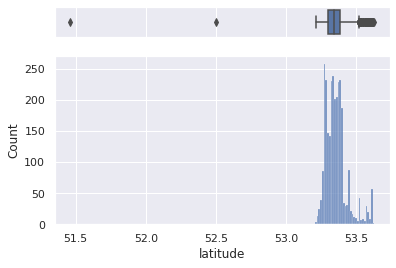

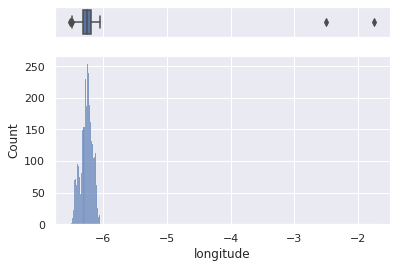

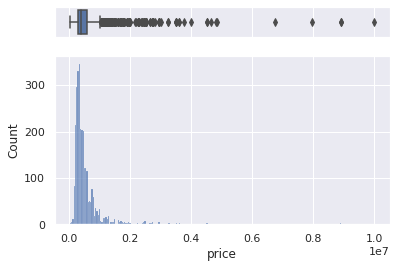

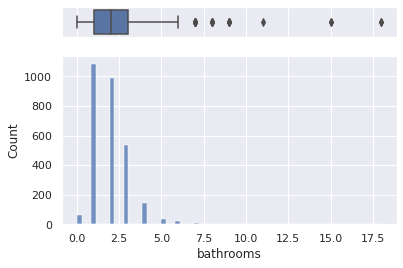

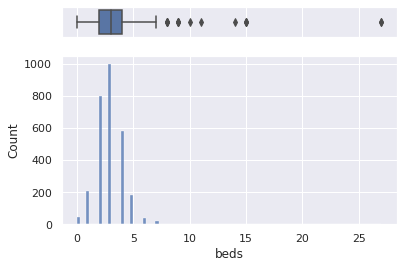

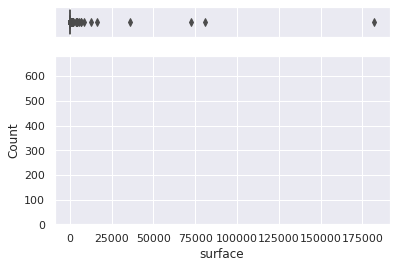

In [143]:
# Representation of the summary of the set of data values 
features = ['latitude', 'longitude', 'price', 'bathrooms', 'beds', 'surface']
fig = plt.figure(figsize=(20,(len(features))*5))
for i in features: 
  # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
  f, (ax_box, ax_hist) = plt.subplots(2,1, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
  
  # assigning a graph to each ax
  sns.boxplot(house_train[i], ax=ax_box)
  sns.histplot(data=house_train, x=i, ax=ax_hist)
  
  # Remove x axis name for the boxplot
  ax_box.set(xlabel='')

plt.show()

In [144]:
house_train[['latitude', 'longitude', 'bathrooms', 'beds', 'surface']].describe()

,latitude,longitude,bathrooms,beds,surface
count,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000
mean,53.355579,-6.257373,1.991355,2.975450,278.567805
std,0.086445,0.142864,1.266439,1.452494,4023.929576
min,51.458439,-6.521183,0.000000,0.000000,3.400000
25%,53.299255,-6.313874,1.000000,2.000000,79.000000
50%,53.345455,-6.252335,2.000000,3.000000,99.000000
75%,53.388423,-6.197056,3.000000,4.000000,128.000000
max,53.630588,-1.744995,18.000000,27.000000,182108.539008


In [145]:
house_train['bathrooms'].values[house_train['bathrooms'].values > 7 ] = 7
house_train['beds'].values[house_train['beds'].values > 10 ] = 10
house_train['surface'].values[house_train['surface'].values > 10000] = 10000
house_train['latitude'] = (house_train['latitude'] -51.45843)/2.173 # From Nigel Portley
house_train['longitude'] = (house_train['longitude'] +6.521187) # From Nigel Portley

house_test['bathrooms'].values[house_test['bathrooms'].values > 7 ] = 7
house_test['beds'].values[house_test['beds'].values > 10 ] = 10
house_test['surface'].values[house_test['surface'].values > 10000] = 10000
house_test['latitude'] = (house_test['latitude'] -51.45843)/2.173 # From Nigel Portley
house_test['longitude'] = (house_test['longitude'] +6.521187) # From Nigel Portley

In [146]:
house_train[['latitude', 'longitude', 'bathrooms', 'beds', 'surface']].describe()

,latitude,longitude,bathrooms,beds,surface
count,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000
mean,0.873055,0.263814,1.972337,2.956777,160.823206
std,0.039781,0.142864,1.127896,1.270913,555.382468
min,0.000004,0.000004,0.000000,0.000000,3.400000
25%,0.847136,0.207313,1.000000,2.000000,79.000000
50%,0.868396,0.268852,2.000000,3.000000,99.000000
75%,0.888170,0.324131,3.000000,4.000000,128.000000
max,0.999613,4.776192,7.000000,10.000000,10000.000000


In [147]:
# Missing Values
print('Train Data Missing Values')
print(house_train.isna().sum())
print('Test Data Missing Values')
print(house_test.isna().sum())

Train Data Missing Values
ad_id                 0
area                  0
bathrooms             0
beds                  0
ber_classification    0
latitude              0
longitude             0
price                 0
property_category     0
property_type         0
surface               0
dtype: int64
Test Data Missing Values
ad_id                 0
area                  0
bathrooms             0
beds                  0
ber_classification    0
latitude              0
longitude             0
property_category     0
property_type         0
surface               0
dtype: int64


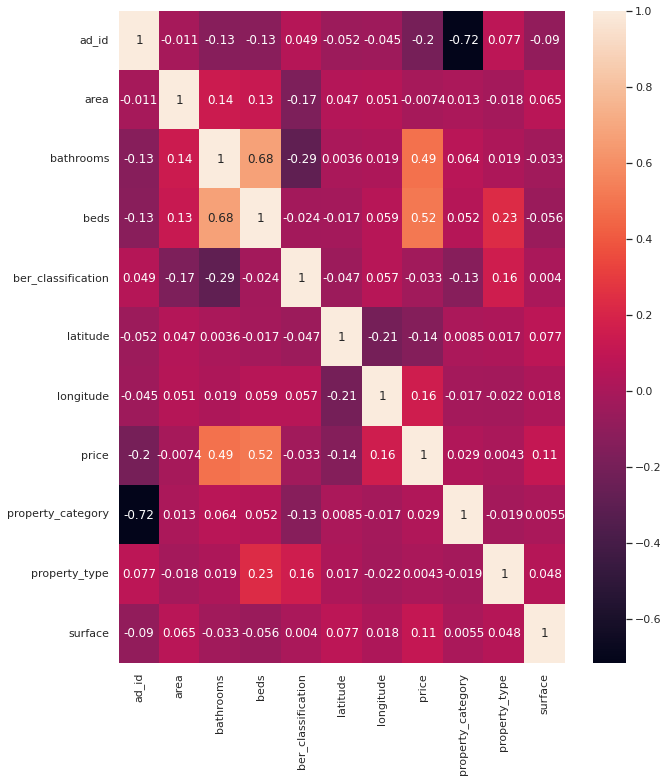

In [148]:
#Correlation Matrix
plt.figure(figsize=(10, 12))
sns.heatmap(house_train.corr(), annot=True);

In [149]:
#Returns column name
print('Train Data Columns',house_train.columns)
print('Test Data Columns',house_test.columns)

Train Data Columns Index(['ad_id', 'area', 'bathrooms', 'beds', 'ber_classification', 'latitude',
       'longitude', 'price', 'property_category', 'property_type', 'surface'],
      dtype='object')
Test Data Columns Index(['ad_id', 'area', 'bathrooms', 'beds', 'ber_classification', 'latitude',
       'longitude', 'property_category', 'property_type', 'surface'],
      dtype='object')


In [150]:
#Returns the dimensions of the array - Rows & Columns
print('Train Data Shape',house_train.shape)
print('Test Data Shape',house_test.shape)

Train Data Shape (2892, 11)
Test Data Shape (500, 10)


**Notes**: 
- We have two different datasets, `true_price` that represents the real cost of the properties and `house_data` that describes the different properties. 
- Initial decision was to merge training and test data from this category to run the preprocessing procedures over the full dataset, to afterwards, split it again as needed. Somehow the new dataset creation after preprocessing didn't fully work at test dataset level.
- True Price has 500 records and 2 columns, with no missing values, `Id` columns has being renamed as it works as the identifier to determine the expected prices from the properties in the house data.
- House Train data has 2982 and 17 columns, with some missing values vs House Test data has 500 and 16 columns. We are going to do some data processing to both types of columns, numerical and categorical, and assess their importance to the problem.
- According to the House Train info, we have 9 categorical variables and 7/8 numerical variables, as the test data doesn't include `price` feature.
- the columns `area`, `ber_classification`, `property_category` were kept for other possible of feature combination in the Piecewise Regression.  
- The `ad_id` was kept for the purpose of possibly defining expected prices of the properties.

**Numerical Variables**:
- `no_of_units` dropped as it has over 98% / 100% of missing values in both datasets.
- `bathrooms`, `beds` and `property_type` contains the same amount of missing values, we inferred that dropping the missing values will affect the others, and it was the case in the training dataset. `bathrooms` and `beds` outliers were removed reassigning those values to the a max of 7 and 10 respectively.
- `price` considering that the main goal is to predict the property prices, with missing values that reach 16.94%. Prefered to drop them, instead of infered them in the training dataset, depending on accuracy, this step could change. 
- `surface` all mising values which represented 15.82%, were fill up with the median. The outliers were removed reassigning those values to the a max of 10.000 sq meters.
- `latitude` and `longitude` had no missing values. The outliers were removed reassigning those values were normzalized following Nigel Portley procedure of dividing `latitude` min between 2.173 and `longitude` adding +6.521187

**Categorical Variables**:
- `area` were converted to numerical variables, replacing the 157 characters, from various cities and towns in County Dublin, County Fingal and County Dun Laoghaire-Rathdown to the various Dublin and Counties that they are located, followed by to a reconfiguration to the correspondent numerical value.
- `ber_classification` were converted to numerical variables, replacing the 16 characters. 
- `county` and `environment` were dropped as they seem to be default values, Dublin and Prod won't yield that much information.
- `description_block` is descriptive text, not able to be used. Dropped as consequence.
- `facility` is descriptive text, not able to be used. Dropped as consequence.
- `features` is descriptive text, not able to be used. Dropped as consequence.
- `property_category` were converted to numerical variables, replacing the 2 characters. 
- `property_type` were converted to numerical variables, replacing the 10 characters.

## Training & Test Data

### Train dataset

In [151]:
# show first data frame rows 
house_train.sample()

,ad_id,area,bathrooms,beds,ber_classification,latitude,longitude,price,property_category,property_type,surface
493,12173270,19,2.0,2.0,8.0,0.833791,0.283116,270000.0,0,1,71.0


In [152]:
#Returns the dimensions of the array
house_train.shape

(2892, 11)

In [153]:
# Generate descriptive statistics
house_train.describe()

,ad_id,area,bathrooms,beds,ber_classification,latitude,longitude,price,property_category,property_type,surface
count,2.892000e+03,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2892.000000,2.892000e+03,2892.000000,2892.000000,2892.000000
mean,1.230511e+07,14.489627,1.972337,2.956777,9.909059,0.873055,0.263814,5.323536e+05,0.002420,4.685685,160.823206
std,2.173032e+05,7.024410,1.127896,1.270913,2.793423,0.039781,0.142864,5.678148e+05,0.049147,2.914514,555.382468
min,9.124101e+06,1.000000,0.000000,0.000000,1.000000,0.000004,0.000004,1.999500e+04,0.000000,1.000000,3.400000
25%,1.227543e+07,9.000000,1.000000,2.000000,8.000000,0.847136,0.207313,2.800000e+05,0.000000,1.000000,79.000000
50%,1.237885e+07,15.000000,2.000000,3.000000,10.000000,0.868396,0.268852,3.800000e+05,0.000000,5.000000,99.000000
75%,1.240400e+07,22.000000,3.000000,4.000000,11.000000,0.888170,0.324131,5.750000e+05,0.000000,6.000000,128.000000
max,1.242836e+07,24.000000,7.000000,10.000000,16.000000,0.999613,4.776192,9.995000e+06,1.000000,10.000000,10000.000000


### Test dataset

In [154]:
# show sample data frame rows 
house_test.sample()

,ad_id,area,bathrooms,beds,ber_classification,latitude,longitude,property_category,property_type,surface
93,12085619,17,2.0,3.0,15.0,0.849454,0.246084,0,6,95.04


In [155]:
#Returns the dimensions of the array
house_test.shape

(500, 10)

In [156]:
# Generate descriptive statistics
house_test.describe()

,ad_id,area,bathrooms,beds,ber_classification,latitude,longitude,property_category,property_type,surface
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0,500.000000,500.000000
mean,1.231695e+07,14.176000,1.992000,2.930000,9.898000,0.873265,0.273345,0.0,4.686000,156.007671
std,1.485832e+05,7.428822,1.096513,1.191612,2.963302,0.037692,0.088552,0.0,2.929944,344.497362
min,1.130615e+07,1.000000,0.000000,0.000000,2.000000,0.811283,0.024200,0.0,1.000000,33.500000
25%,1.228617e+07,7.000000,1.000000,2.000000,8.000000,0.846269,0.224783,0.0,1.000000,72.375000
50%,1.237964e+07,15.000000,2.000000,3.000000,10.000000,0.865677,0.277615,0.0,5.000000,98.000000
75%,1.240544e+07,22.000000,3.000000,4.000000,12.000000,0.885053,0.336132,0.0,6.000000,138.935000
max,1.242809e+07,24.000000,7.000000,7.000000,16.000000,0.994636,0.456313,0.0,10.000000,5746.536120


### Expected Cost dataset

In [157]:
# show sample data frame rows 
true_price.sample()

,ad_id,Expected
299,12388927,645000.0


In [158]:
#Returns the dimensions of the array
true_price.shape

(500, 2)

In [159]:
# Generate descriptive statistics
true_price.describe()

,ad_id,Expected
count,5.000000e+02,5.000000e+02
mean,1.231695e+07,5.810356e+05
std,1.485832e+05,6.009194e+05
min,1.130615e+07,8.500000e+04
25%,1.228617e+07,2.950000e+05
50%,1.237964e+07,4.250000e+05
75%,1.240544e+07,5.950000e+05
max,1.242809e+07,5.750000e+06


# PIECEWISE REGRESSION

## Full Model

In [160]:
# select some features columns just for the baseline model
# assume not all of the features are informative or useful
# in this exercise you could try all of them if possible

featrain = ['latitude','longitude','beds', 'bathrooms', 'property_type', 'price']
# dropna: remove missing values
df_subset_train = house_train[featrain].dropna(axis=0)

featest = ['latitude','longitude','beds', 'bathrooms', 'property_type']
# dropna: remove missing values
df_subset_test  =  house_test[featest].dropna(axis=0)

# Correlation of expected price in df_subset_test 
df_cost = true_price[true_price.index.isin(df_subset_test.index)]

In [161]:
print('Number of nan in df_subset_train dataset: ',df_subset_train.isnull().sum().sum())
print('Number of nan in df_subset_test dataset: ',df_subset_test.isnull().sum().sum())

Number of nan in df_subset_train dataset:  0
Number of nan in df_subset_test dataset:  0


In [162]:
# train set, input columns
Xs_train = df_subset_train.iloc[:,0:-1].values 
# train set, output column, cost
ys_train = df_subset_train.iloc[:,-1].values.reshape(-1,1)   

# test set, input columns
Xs_test = df_subset_test.iloc[:,0:].values 
# test set, output column, cost
y_test = df_cost.Expected.values

In [163]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xss_test)

ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

In [164]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])

Finished [100%]: Average Loss = 3,166.5


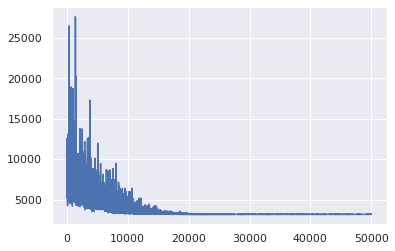

In [165]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);

In [166]:
# samples from the posterior
posterior = approximation.sample(5000)

In [167]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - y_test))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - y_test) / y_test)))

MAE =  217042.07004830134
MAPE =  0.2924117110500084


## Clustering

### Full Model

3392

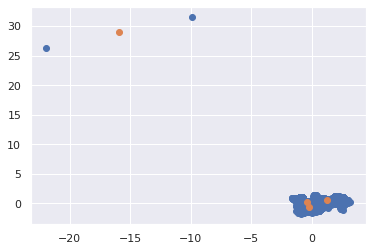

In [187]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
# clustering by features 1 - 2
ind=[0,1]
X_ind = np.vstack([Xn_train[:,ind],Xn_test[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)
# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1])
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])
# lenght of feature clustering
len(X_ind)

### Clusters

In [188]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))

{0: 832, 1: 533, 2: 1525, 3: 2}

In [189]:
# test clusters
clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

{0: 127, 1: 94, 2: 279}

In [190]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_test[clusters_test==0,:]

ylog0 = np.log(ys_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [191]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_test[clusters_test==1,:]
ylog1 = np.log(ys_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [192]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_test[clusters_test==2,:]
ylog2 = np.log(ys_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)

In [193]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_test[clusters_test==3,:]
ylog3 = np.log(ys_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

## Piecewise Model

In [194]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(5000)

Finished [100%]: Average Loss = 883.75


In [195]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, # 
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])
  
with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior1 = approximation.sample(5000)

Finished [100%]: Average Loss = 553.77


In [196]:
 # model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  # linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])
    
with model_2:
  # iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior2 = approximation.sample(5000) 

Finished [100%]: Average Loss = 1,524.7


In [197]:
# model_3
with pm.Model() as model3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn3.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])
    
with model3:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior3 = approximation.sample(5000)

Finished [100%]: Average Loss = 22.052


In [198]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

##Simulations

### Only Cluster 0

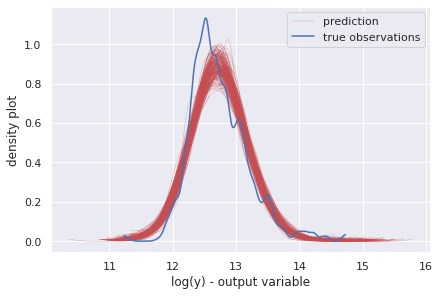

In [199]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Only Cluster 1

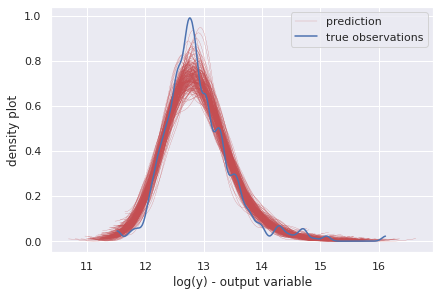

In [200]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Only Cluster 2

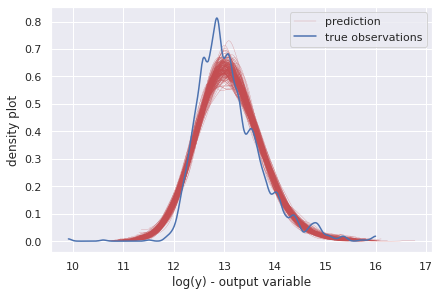

In [201]:
#Simulation
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Only Cluster 3

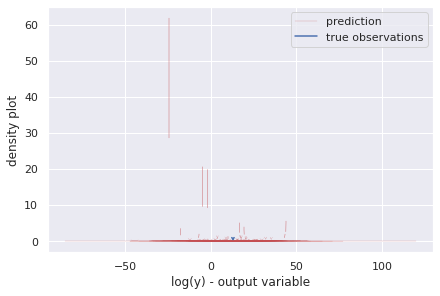

In [202]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

## Overall

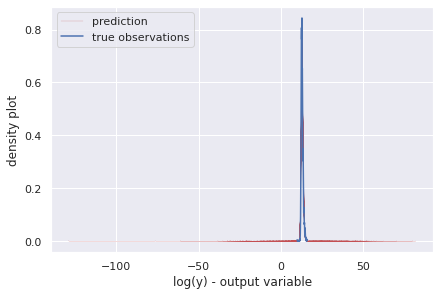

In [203]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

## Test set performance

In [204]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))
print("Size Cluster0", np.sum(clusters_test==0), ", MAE Cluster0=",
      (np.mean(abs(y_pred_BLR0 - y_test[clusters_test==0]))))

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))
print("Size Cluster1", np.sum(clusters_test==1), ", MAE Cluster1=",
      (np.mean(abs(y_pred_BLR1 - y_test[clusters_test==1]))))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))
print("Size Cluster2", np.sum(clusters_test==2), ", MAE Cluster2=",
      (np.mean(abs(y_pred_BLR2 - y_test[clusters_test==2]))))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))
print("Size Cluster3", np.sum(clusters_test==3), ", MAE Cluster3=",
      (np.mean(abs(y_pred_BLR3 - y_test[clusters_test==3]))))

# joint
joint=np.hstack([abs(y_pred_BLR0 - y_test[clusters_test==0]),
                 abs(y_pred_BLR1 - y_test[clusters_test==1]),
                 abs(y_pred_BLR2 - y_test[clusters_test==2]),
                 abs(y_pred_BLR3 - y_test[clusters_test==3])])

# MAE
print("MAE=",np.mean(joint))

Size Cluster0 127 , MAE Cluster0= 117714.77603970663
Size Cluster1 94 , MAE Cluster1= 136907.42142117815
Size Cluster2 279 , MAE Cluster2= 269228.6448011348
Size Cluster3 0 , MAE Cluster3= nan
MAE= 205867.7321403002


### PPC on the Test set



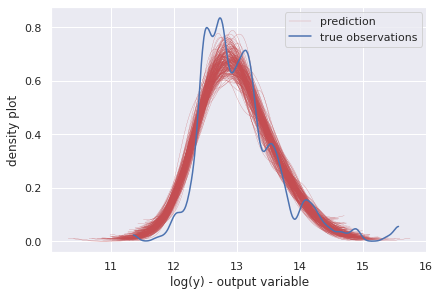

In [205]:
## Posterior predictive checks (PPCs)
num_samples2 = 200
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xtestn0, nsamples=num_samples2)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xtestn1, nsamples=num_samples2)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xtestn2, nsamples=num_samples2)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xtestn3, nsamples=num_samples2)

# Stack arrays in sequence horizontally (column wise)
Ypred = np.hstack([yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])

# plot prediction shape
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
# label
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")

# true observations
az.plot_dist(np.log(y_test),label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

# SUMMARY